In [1]:
%pip install -e . --quiet

import sys
from pathlib import Path

notebook_path = Path.cwd()
root = None
for p in [notebook_path] + list(notebook_path.parents):
	if (p / 'src').exists():
		root = p
		break
if root is None:
	root = notebook_path.parent
sys.path.insert(0, str(root))

Note: you may need to restart the kernel to use updated packages.


ERROR: file:///C:/Users/admin/finaniacal-week1/notebooks does not appear to be a Python project: neither 'setup.py' nor 'pyproject.toml' found.


In [2]:


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from src.data_loader import DataLoader, EDAAnalyzer
from src.text_analyzer import TextAnalyzer
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Set plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

In [4]:
class EDAVisualizer:
    """Class to create EDA visualizations"""
    
    def __init__(self, analyzer: EDAAnalyzer, text_analyzer: TextAnalyzer):
        self.analyzer = analyzer
        self.text_analyzer = text_analyzer
        self.df = analyzer.df
    
    def plot_descriptive_stats(self):
        """Create descriptive statistics plots"""
        fig, axes = plt.subplots(2, 2, figsize=(15, 12))
        
        # Headline length distribution
        axes[0,0].hist(self.df['headline_length'], bins=50, alpha=0.7, edgecolor='black')
        axes[0,0].set_title('Distribution of Headline Lengths')
        axes[0,0].set_xlabel('Headline Length (characters)')
        axes[0,0].set_ylabel('Frequency')
        
        # Top publishers
        top_publishers = self.df['publisher'].value_counts().head(10)
        axes[0,1].bar(range(len(top_publishers)), top_publishers.values)
        axes[0,1].set_title('Top 10 Publishers by Article Count')
        axes[0,1].set_xlabel('Publisher')
        axes[0,1].set_ylabel('Number of Articles')
        axes[0,1].set_xticks(range(len(top_publishers)))
        axes[0,1].set_xticklabels(top_publishers.index, rotation=45, ha='right')
        
        # Articles by day of week
        day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
        day_counts = self.df['day_of_week'].value_counts().reindex(day_order)
        axes[1,0].bar(day_order, day_counts.values)
        axes[1,0].set_title('Articles Published by Day of Week')
        axes[1,0].set_xlabel('Day of Week')
        axes[1,0].set_ylabel('Number of Articles')
        axes[1,0].tick_params(axis='x', rotation=45)
        
        # Articles by hour
        hour_counts = self.df['hour'].value_counts().sort_index()
        axes[1,1].plot(hour_counts.index, hour_counts.values, marker='o')
        axes[1,1].set_title('Articles Published by Hour of Day')
        axes[1,1].set_xlabel('Hour of Day')
        axes[1,1].set_ylabel('Number of Articles')
        axes[1,1].grid(True, alpha=0.3)
        
        plt.tight_layout()
        plt.savefig('notebooks/descriptive_stats.png', dpi=300, bbox_inches='tight')
        plt.show()
    
    def plot_time_series_analysis(self):
        """Create time series analysis plots"""
        time_data = self.analyzer.time_series_analysis()
        
        fig, axes = plt.subplots(2, 2, figsize=(15, 12))
        
        # Daily trend
        time_data['daily'].plot(ax=axes[0,0], title='Daily Article Publications', color='blue')
        axes[0,0].set_ylabel('Number of Articles')
        axes[0,0].grid(True, alpha=0.3)
        
        # Weekly trend
        time_data['weekly'].plot(ax=axes[0,1], title='Weekly Article Publications', color='green')
        axes[0,1].set_ylabel('Number of Articles')
        axes[0,1].grid(True, alpha=0.3)
        
        # Day of week distribution
        time_data['day_of_week'].plot(kind='bar', ax=axes[1,0], title='Articles by Day of Week')
        axes[1,0].set_ylabel('Number of Articles')
        axes[1,0].tick_params(axis='x', rotation=45)
        
        # Hourly distribution
        time_data['hourly'].plot(kind='bar', ax=axes[1,1], title='Articles by Hour of Day')
        axes[1,1].set_ylabel('Number of Articles')
        axes[1,1].set_xlabel('Hour')
        
        plt.tight_layout()
        plt.savefig('notebooks/time_series_analysis.png', dpi=300, bbox_inches='tight')
        plt.show()
    
    def plot_topic_analysis(self):
        """Create topic modeling visualization"""
        # Extract topics
        lda_model, topics = self.text_analyzer.topic_modeling_lda(self.df['headline_clean'].tolist())
        
        fig, axes = plt.subplots(1, len(topics), figsize=(20, 5))
        if len(topics) == 1:
            axes = [axes]
        
        for idx, topic in enumerate(topics):
            words = [word for word, score in topic[:10]]
            scores = [score for word, score in topic[:10]]
            
            axes[idx].barh(range(len(words)), scores)
            axes[idx].set_yticks(range(len(words)))
            axes[idx].set_yticklabels(words)
            axes[idx].set_title(f'Topic {idx + 1}')
            axes[idx].invert_yaxis()
        
        plt.tight_layout()
        plt.savefig('notebooks/topic_analysis.png', dpi=300, bbox_inches='tight')
        plt.show()


In [5]:

# Load and preprocess data
loader = DataLoader(r'C:\Users\admin\finaniacal-week1\data\raw_analyst_ratings.csv')  
df = loader.preprocess_data()

Data loaded successfully. Shape: (1407328, 6)
Data preprocessing completed. Final shape: (55987, 12)


In [6]:

# Perform EDA
analyzer = EDAAnalyzer(loader)
stats = analyzer.descriptive_statistics()
publisher_stats = analyzer.publisher_analysis()

In [7]:

# Text analysis
text_analyzer = TextAnalyzer()
keywords = text_analyzer.extract_keywords(df['headline_clean'].tolist())
publisher_keywords = text_analyzer.analyze_publisher_keywords(df)


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [8]:
import os

# Create directories if they don't exist
os.makedirs('notebooks/images', exist_ok=True)
os.makedirs('notebooks/data', exist_ok=True)


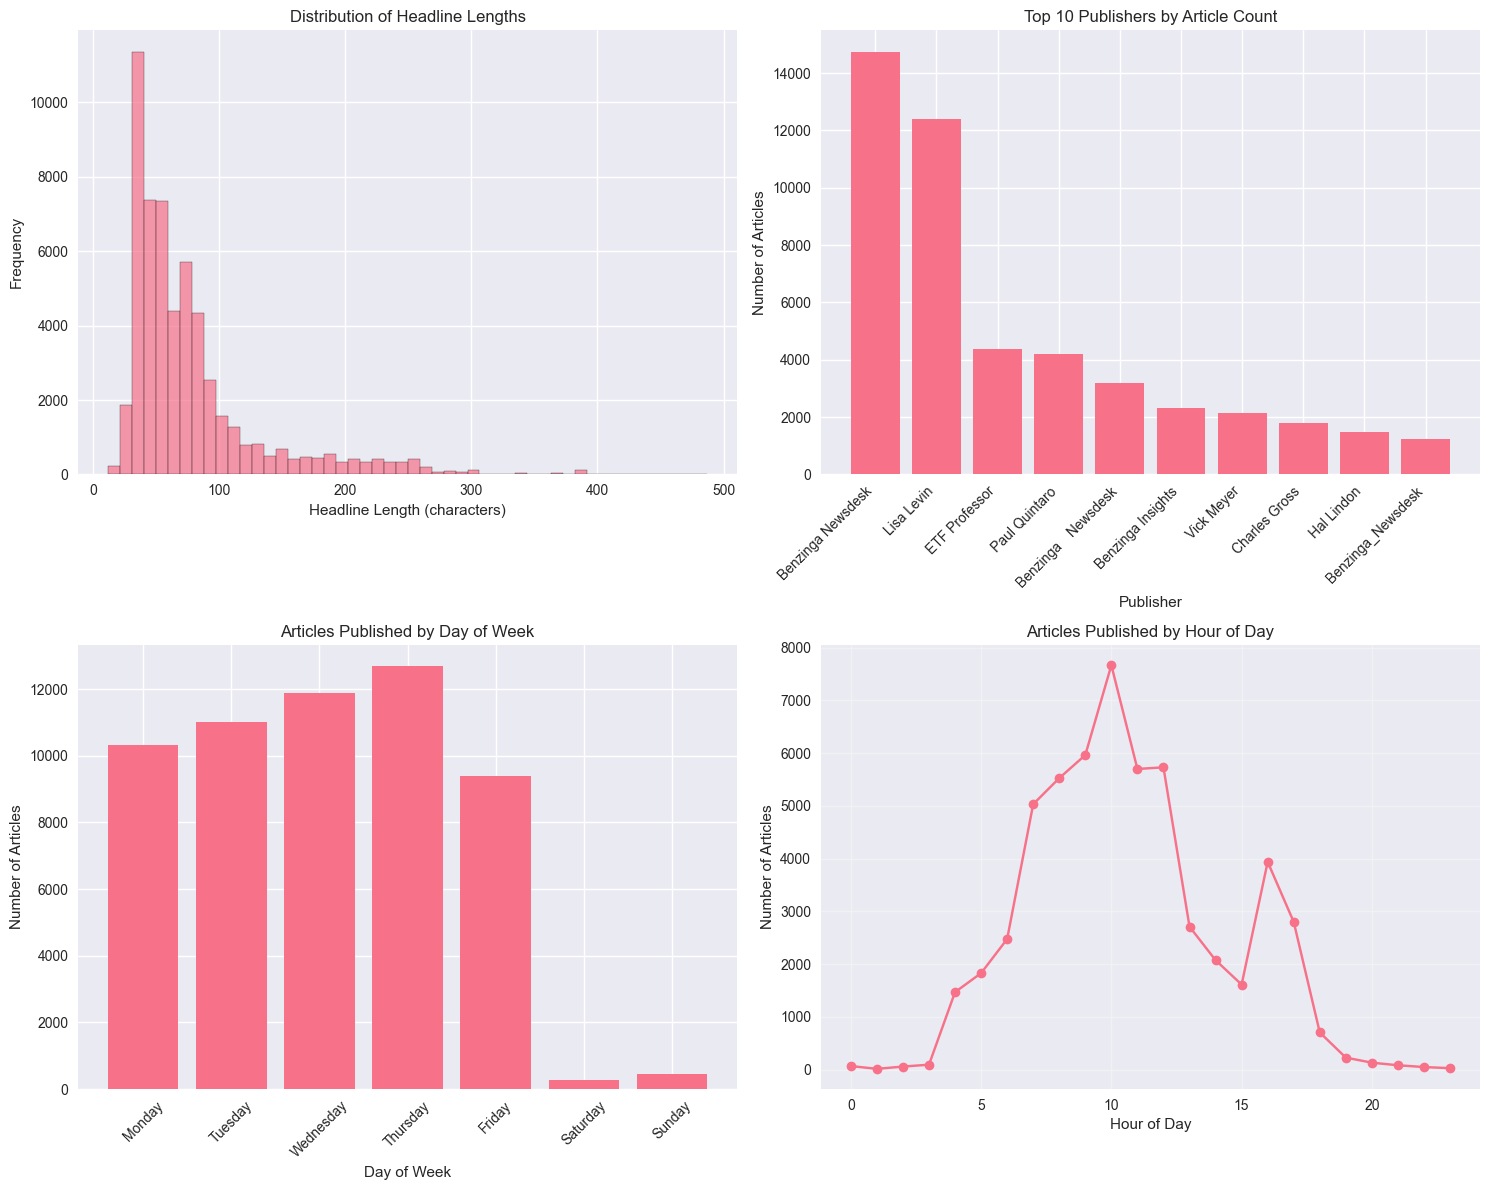

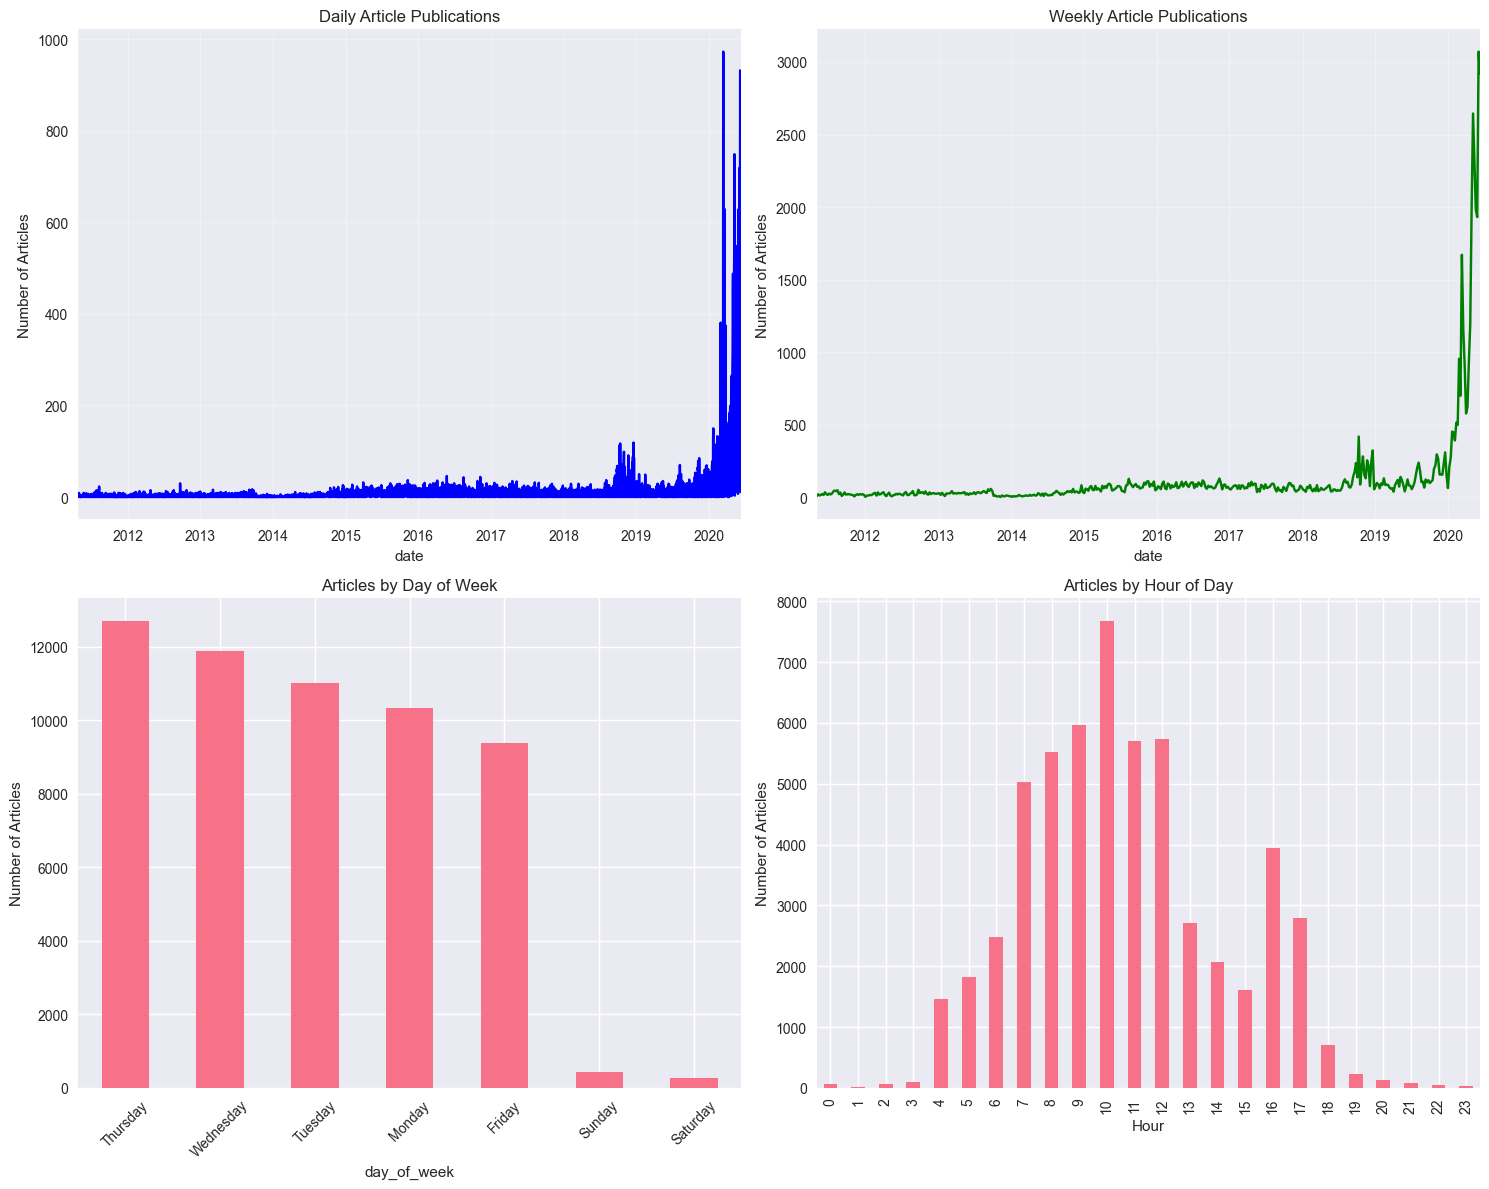

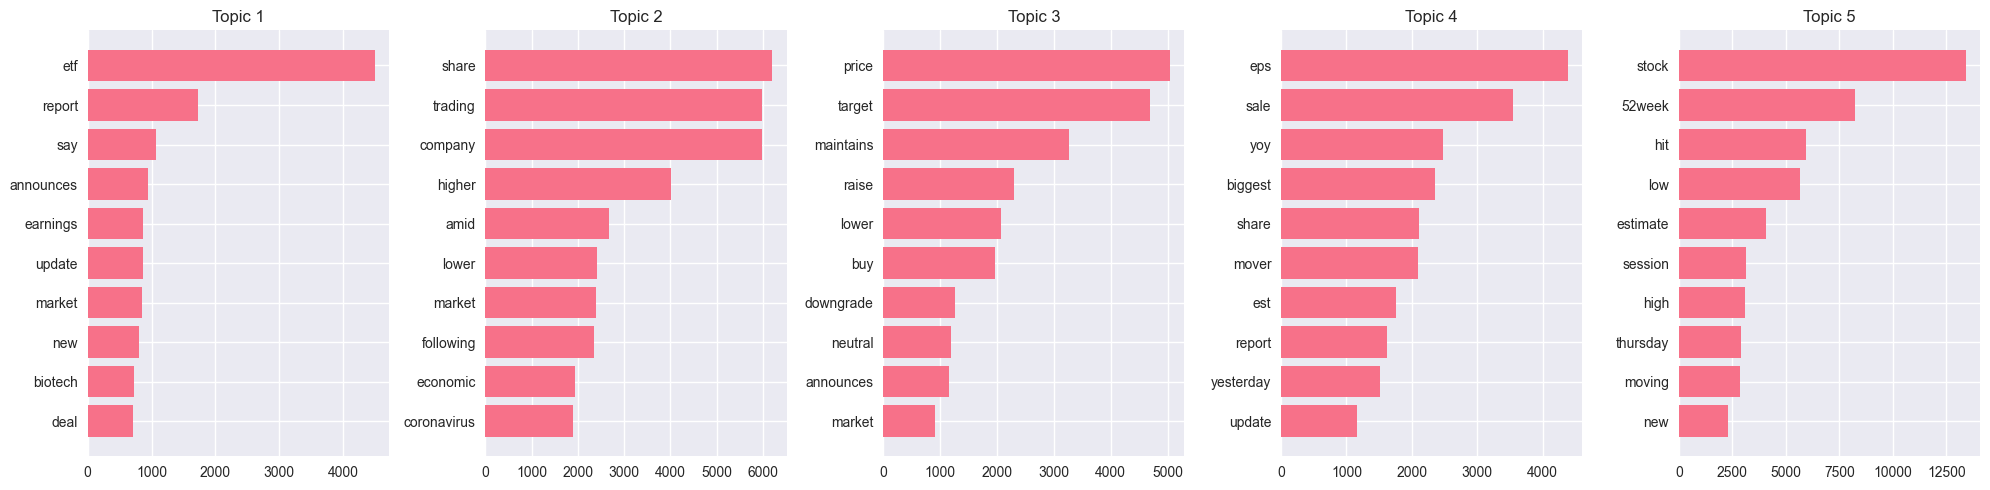

In [9]:
# Create visualizations
visualizer = EDAVisualizer(analyzer, text_analyzer)
visualizer.plot_descriptive_stats()
visualizer.plot_time_series_analysis()
visualizer.plot_topic_analysis()

In [10]:

# Print key findings
print("DESCRIPTIVE STATISTICS ")
print(f"Total Articles: {stats['total_articles']}")
print(f"Date Range: {stats['date_range']['start']} to {stats['date_range']['end']}")
print(f"Number of Publishers: {stats['publishers_count']}")
print(f"Average Headline Length: {stats['headline_length_stats']['mean']:.2f} characters")

print("\nTOP PUBLISHERS ")
print(publisher_stats.head(10))

print("\n TOP KEYWORDS ")
for word, score in keywords[:15]:
    print(f"{word}: {score:.4f}")

DESCRIPTIVE STATISTICS 
Total Articles: 55987
Date Range: 2011-04-27 21:01:48-04:00 to 2020-06-11 17:12:35-04:00
Number of Publishers: 225
Average Headline Length: 77.18 characters

TOP PUBLISHERS 
                   article_count  avg_headline_length  std_headline_length  \
publisher                                                                    
Benzinga Newsdesk          14750                92.87                52.47   
Lisa Levin                 12408                43.08                15.45   
ETF Professor               4362                42.99                10.62   
Paul Quintaro               4212                79.84                35.45   
Benzinga Newsdesk           3177               223.18                65.09   
Benzinga Insights           2332                44.29                11.46   
Vick Meyer                  2128                73.50                13.46   
Charles Gross               1790                77.69                35.68   
Hal Lindon            